# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Data Exploration](#2.-Data-Exploration)<br><br>

3. [Feature Exploration](#3.-Feature-Exploration)<br><br>

4. [Data Cleaning & Preprocessing](#4.-Data-Cleaning-&-Preprocessing)<br><br>

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

# from ydata_profiling import ProfileReport

# Visualisations
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Encoding
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

import functions as f

**Data**

In [2]:
df = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', 
                 sep = ';', index_col = 'ID')
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


# 2. Data Exploration

<a href="#top">Top &#129033;</a>

**Profiling Report**

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

- 89 (0.1%) duplicates
- 5173 (0.2%) missing
- many imbalanced variables 
- high % of zeros in some variables

## 2.1 Descriptive statistics

<br>

By using the `describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. By examining these statistics, we can gain the first insights into the distribution of the data, helping to identify anomalies.

**2.1.1 Numerical Features**

By default, the `.describe()` method focuses on the numerical features of the dataset. We will begin our analysis with these features to gain insights into their characteristics and distributions. Eventhough, binary features are categorical, these are also included in this method and will be analysed in this section.

In [4]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,2.203825,0.042512,0.001307,0.000224,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,2.301637,0.201755,0.036125,0.014957,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br>

Observations:

- `Age`: The ages of customers range from a minimum of -10 to a maximum of 123, suggesting incoeherences. The average customer age is approximately 45.64 years, with a standard deviation of 17.24, indicating a broad age distribution. Notably, 50% of customers are aged 47 or younger, while 75% are below 58 years old, showing that the majority of guests are middle-aged adults.

- `DaysSinceCreation`: The number of days since account creation spans from 36 to 1,385 days since the date of dataset creation. 

- `AverageLeadTime`: The average lead time for bookings is around 60.89 days, though this varies widely, reaching up to 588 days (these ones are probably a customer on holiday). The minimum number of days appear as -1 and this is impossible, which suggests data inconsistency. Interesting to see that, 25% of the customers do the booking on the same day of the arrival, suggesting that these customers might be corporate customers.

- `LodgingRevenue`: Lodging revenue per customer varies significantly, with a mean of 284.10 monetary units and a standard deviation of 379.23 monetary units. 25% of the customers do not generate revenue, maybe this occurs due to cancellations or data inconsistency. The maximum revenue per customer obtained is 21 781 monetary units, this can be a potential outlier, eventhough it is a true value it is higher than the majority of values.

- `OtherRevenue`: 25% of customers do not spend on other expenses, besides the room. The maximum number of revenue is 8859 monetary units per customer and this can, also, be a potential outlier with the same reason as in `LodgingRevenue`.

- `BookingsCanceled` and `BookingsNoShowed`: When it comes to booking behavior, cancellations and no-shows are relatively rare, with an average of just 0.002 and 0.0006 per customer, respectively. 

- `BookingsCheckedIn`, `PersonsNights` and `RoomNights` have highly skewed distributions that can be identified by the difference between values in the maximum value and the third quartile. These values might indicate the exostence of outliers (as they could reflect unique customer segments, such as loyal customers) 

Regarding special requests, the most common request is alcohol in the bar (most all of the customers), followed by a king-size bed (36.35% of customers) and twin beds (15.69%). Requests for high-floor rooms (4.25%) are more frequent than those for low-floor rooms (0.13%), while accessibility-related requests, such as cribs or wheelchair-friendly rooms, are relatively rare. Only 0.36% of customers request rooms near the elevator and 8.8% request rooms far away from the noise. 

<br>

**2.1.2 Categorical Features**

Next, we will analyze the statistics for the categorical data. To do this, we will use the include parameter and set it to object. This will generate a summary that includes the count of entries, the number of unique values, the most frequent value, and the frequency of that top value for each categorical column.

In [5]:
df.describe(include=object)

,Nationality,NameHash,DocIDHash,DistributionChannel,MarketSegment
count,111733,111733,110732,111733,111733
unique,199,107584,103480,4,7
top,FRA,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,Travel Agent/Operator,Other
freq,16516,75,3032,91019,63680


To better understand the results, we will display the unique values for each categorical column.

In [6]:
for column in ['DistributionChannel', 'MarketSegment']:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in DistributionChannel: ['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
Unique values in MarketSegment: ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']


- `Nationality`: Most of the customers of the hotel are french. High cardinality. Probability of having imbalanced categories.
- `DistributionChannel`: 91019 customers (this number might be lower due to duplicate values) book their rooms using travel agents. 
- `MarketSegment`: Other is the most common customer segmentation.

<br>


**2.1.3 Exploring the dataset structure with .info() method**

The `.info()` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

<br>


**2.1.4 Unique Values**


In [8]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 9
    if df[column].nunique() < 9:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'BookingsCanceled': [ 1  0  3  2  4 15  7  5]
Number of unique values: 8

Unique values in 'BookingsNoShowed': [0 1 2 3]
Number of unique values: 4

Unique values in 'DistributionChannel': ['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
Number of unique values: 4

Unique values in 'MarketSegment': ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Number of unique values: 7

Unique values in 'SRHighFloor': [0 1]
Number of unique values: 2

Unique values in 'SRLowFloor': [0 1]
Number of unique values: 2

Unique values in 'SRAccessibleRoom': [0 1]
Number of unique values: 2

Unique values in 'SRMediumFloor': [0 1]
Number of unique values: 2

Unique values in 'SRBathtub': [0 1]
Number of unique values: 2

Unique values in 'SRShower': [0 1]
Number of unique values: 2

Unique values in 'SRCrib': [0 1]
Number of unique values: 2

Unique values in 'SRKingSizeBed': [0 1]
Number of unique values: 2

Unique values in 'SRTwinB

<br>

## 2.2 Duplicate Records

It is also important to verify if there are any duplicate rows in the dataset to mantain data integrity. Since `ID` was successfully set as the index, in the data importation,  we know it has no duplicate values. If duplicates were found for this specific column, setting it as the index would not have been possible.

However, eventhough `ID` had no duplicates, duplicate records of the same row might still exist in the dataset. To detect such cases, we can examine by the feature `DocIDHash` as this represents the HASH of the customer's personal idenitification number and this is unique to each individual.

In [9]:
df[df.duplicated(keep = False)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
594,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
595,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
701,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,0,0,0,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
702,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,0,0,0,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
1110,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107561,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
108604,PRT,NaN,61,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
108605,PRT,NaN,61,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 111


From the output above, we can identify two scenarios:

- **Duplicate Individuals**: 111 individuals appear twice in the dataset. Since these are redundant records, we can solve this by keeping only one row of each duplicate

- **Missing Identification Data**: some individuals have no information about their hash identification number

Given these insights we will proceed to remove those 111 rows from the dataset. Regarding, the existence of missing data it will be further explored.

In [11]:
df = df[~df.duplicated(keep='first')]

<br>

## 2.3 Missing Data Analysis

In our previous analysis, we identified that some columns contain missing values. To further investigate, we will explore it using a function called `missing_value_summary`, which provides insights by displaying the number of unique values in each feature with missing data, the total count of missing values, and their percentage relative to the entire dataset.

In [12]:
f.missing_value_summary(df)

,Unique Values,NaN Values,Percentage NaN
Age,106,4092,3.665944
DocIDHash,103480,932,0.834961


Approximately 4% of customer ages are missing, affecting 4172 customers. Additionally, 0.90% (1001 customers) are missing the hashed customer identification number. Again, these values might be substantially lower given the existence of 111 duplicated customers.

We can visualize and analyse missing values by using the library missingno. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data.

<br>

`Missingno` Bar Plot

Below we have plotted the count of values per column, organized in ascending order. This means that columns with the lowest values are positioned first, followed by those with higher counts.

<Axes: >

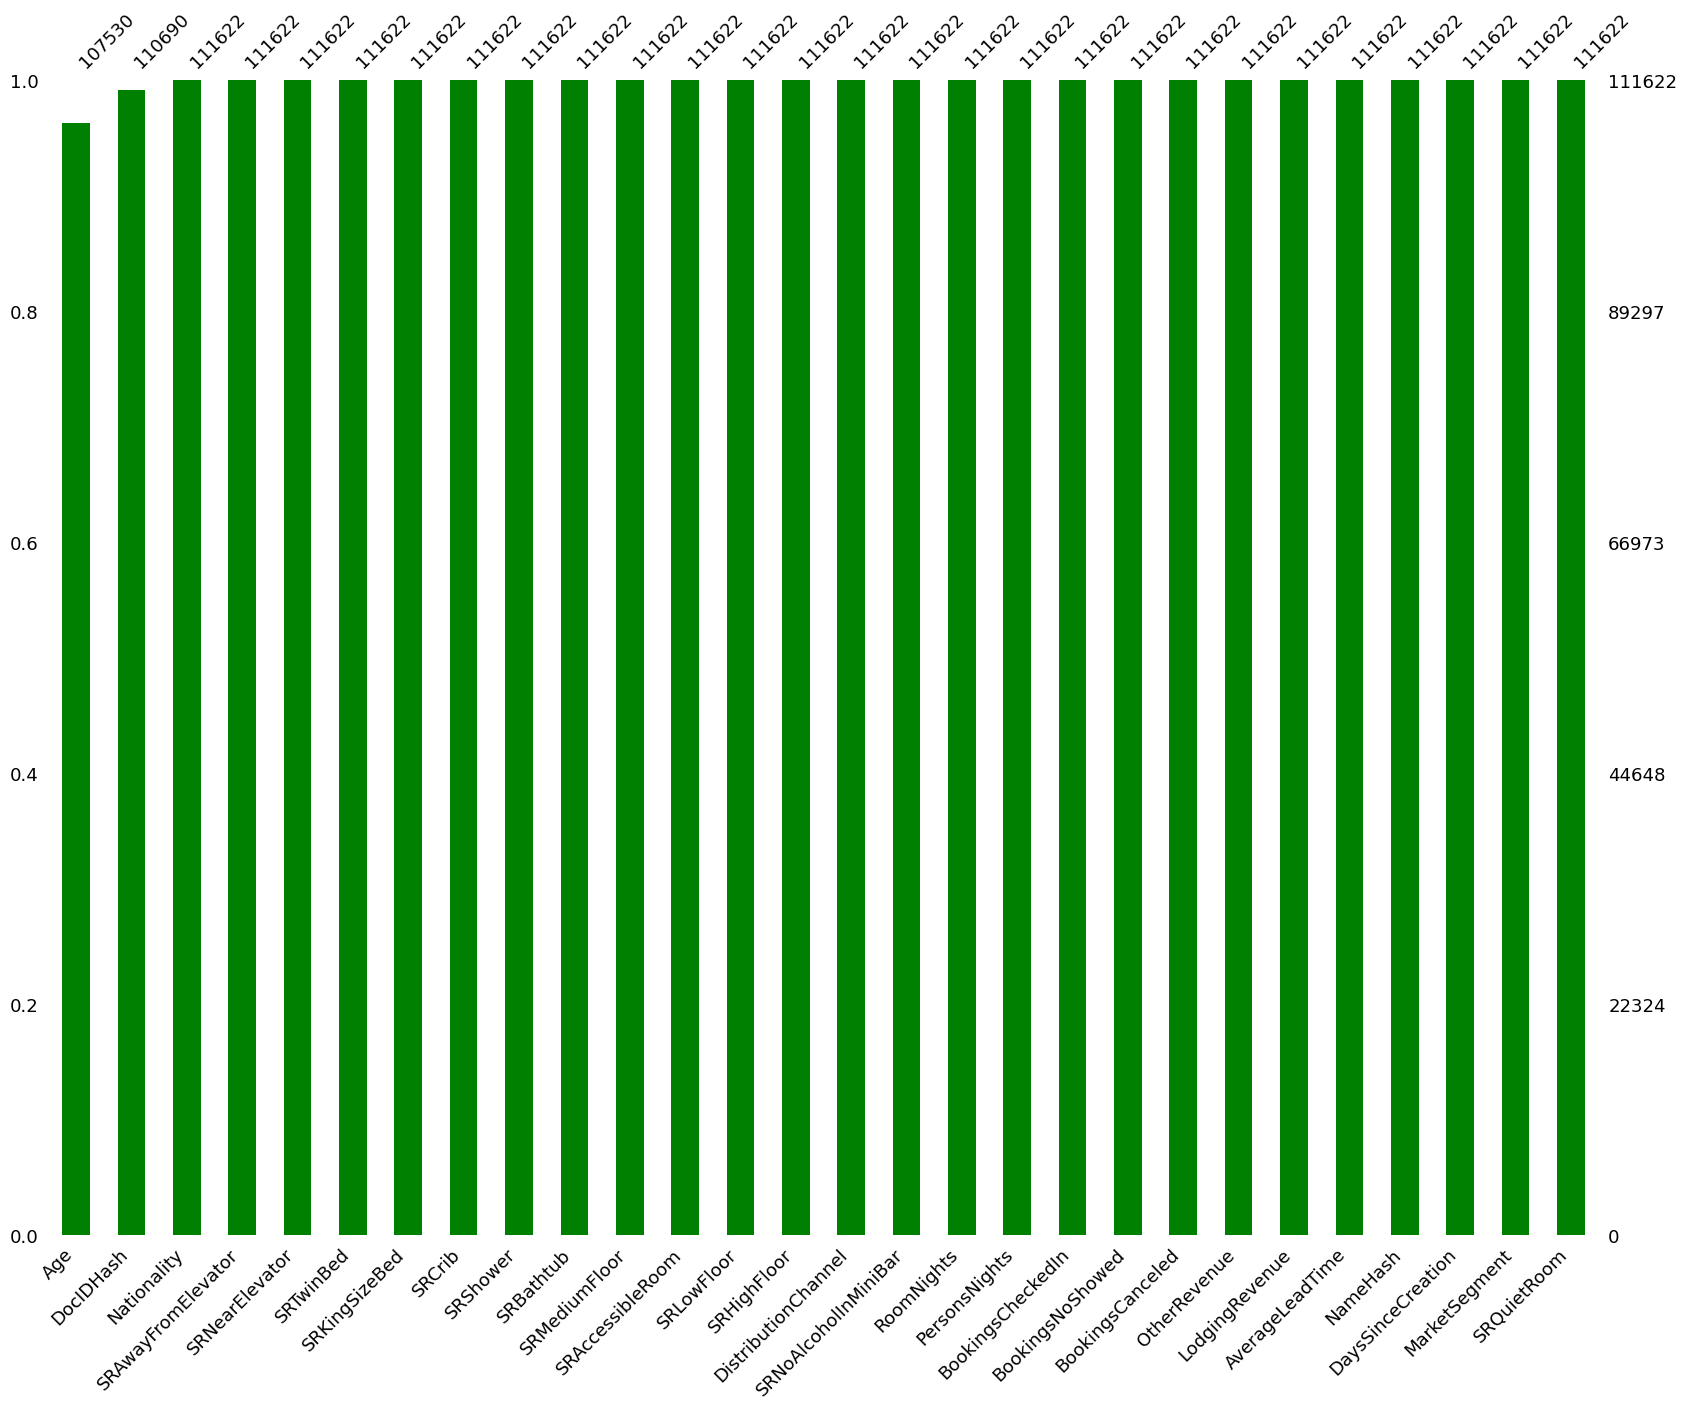

In [13]:
msno.bar(df, figsize=(20,15), fontsize=13, 
         color='green', sort="ascending")

As it can be seen and as mentioned previously, we can see that the columns `Age` and `DocIDHah` exhibit missing values. These two variables have a relatively low percentage of missing data, with less than 5% of their values missing.

<br>

`Missingno` Heatmap visualization

We can also use the missingno library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, while one column has missing values the other has not. Values around zero indicate no significant correlation between the missing data between two columns.

<Axes: >

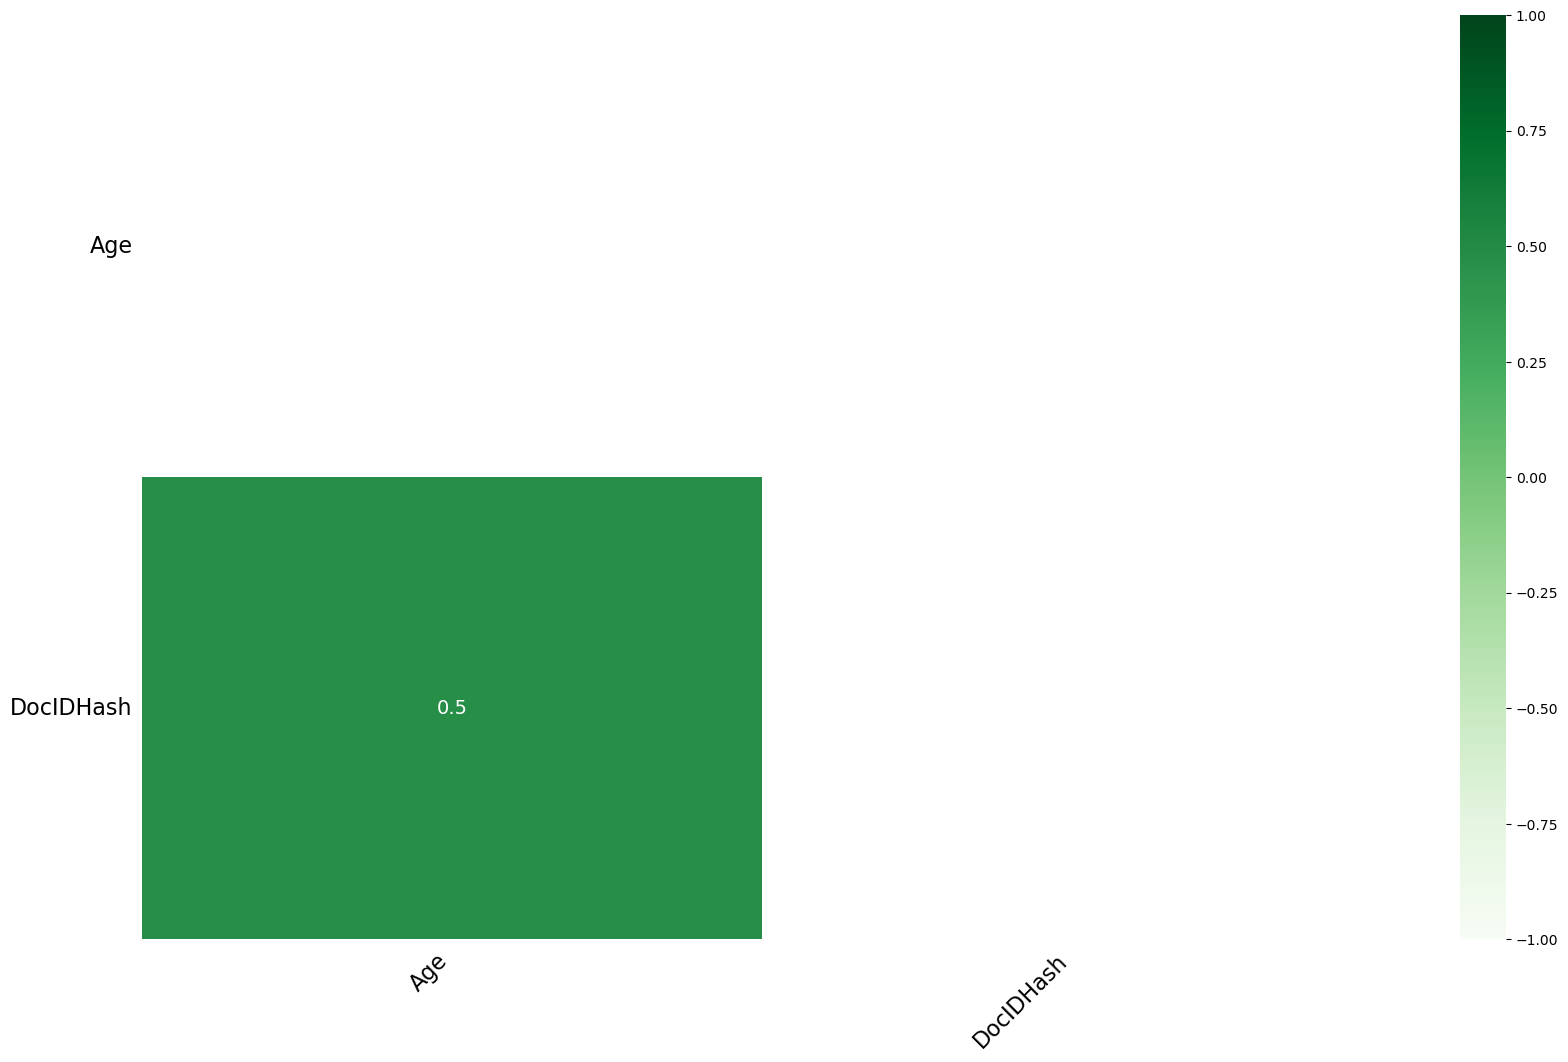

In [14]:
msno.heatmap(df, cmap='Greens')

From the heatmap, we can conclude that whenever `Age` is missing, there is a probability of 50% that `DocIDHash` is also missing.


In section `3. Data Cleaning and Preprocessing`, we will impute/remove the missing values.

# 3. Feature Exploration

<a href="#top">Top &#129033;</a>

**Exploring previous segmentation**

In [15]:
df.groupby('MarketSegment')[df.select_dtypes(include=['float64', 
                                                      'int64']).columns].mean().T

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
Age,50.984906,41.424188,45.476946,42.634771,54.993340,43.349259,51.216886
DaysSinceCreation,698.013889,606.946565,604.455817,536.677833,661.291441,591.783404,616.088334
AverageLeadTime,5.336806,21.749618,23.738997,40.123304,95.866812,53.675640,94.442956
LodgingRevenue,530.432465,22.094290,305.144661,306.526789,270.597595,299.380410,214.055867
OtherRevenue,80.760590,15.201511,64.018570,66.680405,68.874824,62.607870,70.042209
BookingsCanceled,0.072917,0.048855,0.053907,0.001773,0.000262,0.000110,0.000306
BookingsNoShowed,0.024306,0.000000,0.017059,0.000367,0.000000,0.000000,0.000245
BookingsCheckedIn,1.461806,1.141985,1.442511,0.693789,0.817293,0.692844,0.748394
PersonsNights,5.145833,3.216794,3.394405,4.066512,3.557118,4.542811,4.519117
RoomNights,4.989583,1.992366,2.835892,1.977014,2.284105,2.166512,2.378540


In [17]:
pd.crosstab(index=df['MarketSegment'], columns=df['DistributionChannel'])

DistributionChannel,Corporate,Direct,GDS Systems,Travel Agent/Operator
MarketSegment,,,,
Aviation,281,0,0,7
Complementary,19,508,0,128
Corporate,2204,51,2,674
Direct,13,15965,7,373
Groups,480,171,5,10794
Other,37,151,677,62728
Travel Agent/Operator,99,30,5,16213


- `Age`: The oldest guests belong to the **Groups** segment (54.99 years), probably due to excursions, followed by **Travel Agent/Operator** (51.22 years). The youngest guests are in the **Complementary** segment (41.42 years).  

- `DaysSinceCreation`: Highest for **Aviation** (698 days), which makes sense as these customers always need pre-arranged bookings.

- `AverageLeadTime`: **Groups** (95.87 days) and **Travel Agent/Operator** (94.44 days) book more in advance, with **Aviation** having the shortest lead time (5.34 days), likely due to flight changes.  

- `LodgingRevenue`: **Aviation** has the highest lodging revenue (530.43 monetary units), likely due to corporate agreements. **Travel Agent/Operator** has the lowest lodging revenue (214.06 monetary units), likely due to discounted rates.

- `OtherRevenue`: Highest for **Aviation** (80.76 monetary units) and lowest for **Complementary** (15.20 monetary units).  

- **Aviation** has the highest cancellation rate (7.29%) and no-show rate (2.43%), likely due to flight changes. **Direct, Groups, and Travel Agent/Operator** have almost zero cancellations and no-shows, indicating high commitment since these stays are planned. **Aviation** (1.46) and **Complementary** (1.14) have the highest number of checked-in guests per booking. **Direct** and **Groups** have lower check-ins, since these customers normally book from different hotels and cities in each trip.

- `PersonsNights` and `RoomNights`: **Aviation** guests stay the longest or have more people stay in (5.15 nights) and book the most rooms (4.99). This is probably because these bookings are arranged for the cabin crew (pilot and flight attendants). **Direct and Groups** have shorter stays (~3.5 nights) with fewer rooms (2.28-2.38), since these are mostly travelers that stay less days.

- King-size beds are highly requested by **Complementary** (33.13%) and **Other** (50.14%) segments. **Twin beds** are more popular among **Groups** (23.04%) and **Travel Agent/Operator (17.24%)**, which makes sense as these came in groups or families with kids.

- **Direct** guests show the highest preference for high floors (5.05%), rooms away from elevator (0.72%). Quiet rooms are highly requested by **Other** (13.94%) and **Direct** (4.62%) guests. Cribs are most requested by **Complementary** (3.51%), suggesting family travel.  

Overall, **Aviation** is a high-revenue segment with long stays but frequent cancellations; **Groups and Travel Agents** book in advance but generate lower revenue, compared to **Aviation**. **Direct** bookings have short lead times and low cancellations, making them reliable customers. **Complementary guests** are younger, have low revenue contributions, and request more family-friendly options (cribs, twin beds).

In terms of bookings, customers in the **Aviation** segment primarily book through corporate channels, which makes sense due to the nature of their work-related stays. The **Complementary** segment, however, typically books directly at the hotel, which seems unusual since these groups appear to be families who would likely find it more convenient to book through a travel agent or GDS system. The **Corporate** segment also predominantly books through corporate channels, followed by travel agents or operators. As expected, the **Direct** segment books their stays directly with the hotel. Meanwhile, the **Groups**, **Other**, and **Travel Agent/Operator** segments rely more on travel agencies for their bookings.

<br> 

**Splitting types of features**

In [ ]:
# Numerical Columns
num_cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime',
            'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
            'BookingsNoShowed', 'BookingsCheckedIn',
            'PersonsNights', 'RoomNights']

# Categorical Columns
categ_cols = [col for col in df.columns if col not in num_cols]

# Binary Columns
sr_cols = [col for col in df.columns if col.startswith('SR')]

## 3.1 Univariate Analysis

### Numeric Variables

In [ ]:
f.histograms(df, num_cols)

Highlights
- age < 0 and > 100
- averageleadtime right skewed (many customers make the reservation on the same day as check in)
- LodgingRevenue and OtherRevenue with mostly low values
- high extremes in BookingsCanceled,BookingsCheckedIn, PersonsNights, RoomNights

<br>

**Age**

The first feature we are going to analyze is `Age`. While the hotel's specific policy is not available due to anonymization, we can reference the standard regulations in Portugal, where the minimum age for hotel check-in is 18. However, customers aged 16 or 17 may check-in independently if they provide a parental consent form. As such, we will consider any age below 16 as an anomaly in this context.

In [ ]:
df['Age'].value_counts().sort_index().plot(kind='bar', 
                                           figsize=(20, 10), color='green')

plt.axvline(x=21, color='red', linestyle='--', linewidth=4)
plt.axvline(x=95, color='red', linestyle='--', linewidth=4)
plt.xlabel('Customer age')
plt.ylabel('Number of customers')
plt.title('Age distribution')
plt.show()

In [ ]:
print(f"There are {df[df['Age'] < 16].shape[0]} customers under 16 in the dataset.")

In [ ]:
print(f"There are {df[df['Age'] < 0].shape[0]} customers with negative age in the dataset.")

In [ ]:
print(f"There are {df[(df['Age'] >= 100)].shape[0]} customers over 100 in the dataset and the oldest customer is {df['Age'].max()} years old.")

Our analysis identified 5744 customers who fall below the minimum required age threshold, including 14 customers whose ages appear as negative values. Additionally, we found 9 customers recorded as over 100 years old, with the oldest listed as 123. These values raise potential data integrity concerns, as they may indicate incorrect values in data collection. In this way, further potential data cleaning steps are necessary.

<br>

**Days since the customer was created**

The second feature to check is regarding the number of days since an account was made for a specific customer. From previous insights, there were no inconsistencies found in this feature.

In [ ]:
print(f"There are {df[df['DaysSinceCreation'] == df['DaysSinceCreation'].min()].shape[0]} most recent customers, having created their accounts {df['DaysSinceCreation'].min()} days before the dataset's last recorded date.")

In [ ]:
df[df['DaysSinceCreation'] == df['DaysSinceCreation'].min()]

From the previous output, it seems that these are different customers and therefore no incoherence can be found regarding that. However, it is evident that there are certain records where both `LodgingRevenue` and `OtherRevenue` are 0, and there is indication that the booking was not canceled and that the customer show up. In these cases, it appears that these entries may represent data entry errors rather than actual customer bookings.

These records are likely non-representative of real customers and further investigation will be conducted to explore this issue.

In [ ]:
df[df['DaysSinceCreation'] == df['DaysSinceCreation'].max()].head(1)

The oldest accounts were established 3 years and 9 months prior to the dataset closed date.

**Average Lead Time**

In [ ]:
df[df['AverageLeadTime'] == -1].head()

In [ ]:
print(f"Number of customers with a negative value: {df[df['AverageLeadTime'] == -1].shape[0]} customers")

We have identified 13 customers with a negative value for the average number of days before arrival for booking, which is not feasible. All other features for these customers appear to be correct. Therefore, a potential solution would be to adjust the `AverageLeadTime` for these cases to a more realistic value, such as 0 or 1.

<br>

**Bookings**

In [ ]:
df[df['BookingsCheckedIn']==0]

In [ ]:
print(f"Bookings cancelled: {df[df['BookingsCanceled'] != 0].shape[0]}")
print(f"Customer did not show: {df[df['BookingsNoShowed'] != 0].shape[0]}")

<div class="alert-danger">
  
# MISSING

- LodgingRevenue, OtherRevenue, PersonsNights, RoomNights

### Categorical Variables

<br>

**Checking the hash of a customer identification number**

There are some customer identification number missing in the dataset and this will be fixed in a latter section . However, it is also crucial to check for potential issues, such as whether the same customer identification number is associated with different names. Additionally, it’s important to track how often this occurs.

In [ ]:
filter_dataset = df[(~df['DocIDHash'].isna()) & ~df.duplicated(keep='first')]
filter_dataset

In [ ]:
print(f"There are {filter_dataset['DocIDHash'].nunique()} different identification numbers in the dataset, \
      while {filter_dataset.duplicated(['DocIDHash']).sum()} appear more than once.")


Checking the number of times each document identification appears in the dataset.

In [ ]:
filter_dataset['DocIDHash'].value_counts().head(10)

From the output, we can see that there exists an document ID number that appears 3021 which is unusually high, followed by others that, also, appear more times. These can be, for instance, a corporate client making reservations for employees. Therefore, we will analyse those rows.

Client with most reservations

In [ ]:
unusual_customer = filter_dataset[filter_dataset['DocIDHash'] == "0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855"]
unusual_customer

In [ ]:
# Name used in the booking
unusual_customer['NameHash'].value_counts()

It appears that these customers are on business trips.

In [ ]:
filter_dataset[filter_dataset['DocIDHash'] == "0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076"].head()

In [ ]:
filter_dataset[filter_dataset['DocIDHash'] == "0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003"].head()

**Nationality**

In [ ]:
# top 20 because we can clearly see the x-axis labels
f.top_n_histogram(df, categ_cols[0], N = 20)    

Since the nationality of a customer is recorded using the ISO 3166-1 three-letter code, it's important to check if there are any customers with invalid nationality codes.

In [ ]:
invalid_codes = df[df['Nationality'].apply(lambda x: len(x) != 3)]['Nationality'].unique()

if len(invalid_codes) > 0:
    print('Invalid codes:', invalid_codes)
else:
    print('All codes are valid!')

All nationality codes are correct.

**Distribution Channel**

In [ ]:
f.unique_histogram(df, categ_cols[3])

- travel agent by far most common
- GDS systems w/ low usage

**Market Segment**

In [ ]:
f.unique_histogram(df, categ_cols[4], rotation = 15)

- aviation & complementary very small
- other highest by far

**Binary Columns**

In [ ]:
# Plot histogram for each SR column
for col in sr_cols:
    f.unique_histogram(df, col)


<div class="alert-danger">
  
# MISSING

- Insights

## 3.2 Bivariate Analysis

### Numerical vs Numerical

In [ ]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1, fmt='.2f', annot_kws={"size": 7})
plt.title("Spearman Correlation Matrix")
plt.show()


In [ ]:
# Mask correlations less than 0.85 and stack the result into a series
filtered_corr = correlation_matrix.where(correlation_matrix > 0.85).stack()

# Create a DataFrame from the filtered correlations
filtered_corr_df = filtered_corr.reset_index(name='correlation')

# Remove duplicate pairs 
filtered_corr_df = filtered_corr_df[filtered_corr_df['level_0'] < filtered_corr_df['level_1']]
filtered_corr_df

**Persons/Nights and Room/Nights**

In [ ]:
# Number of nights and rooms stayed by the customer
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  
df['PersonsNights'].value_counts().sort_index().plot(
    kind='bar', color='orange', ax=axes[0], title="Persons Nights"
)

df['RoomNights'].value_counts().sort_index().plot(
    kind='bar', color='orange', ax=axes[1], title="Room Nights"
)

plt.tight_layout()  
plt.show()

**Revenue**

Another potential inconsistency is observed in the `LodgingRevenue` feature. While a minimum value of 0 may be plausible if the customer has spent in other hotel-related expenses, such as for food, spa services, or in other expenses, it becomes incoherent if both `LodgingRevenue` and other related revenues are 0. This would suggest that there were no transactions and these records may not represent actual customers.

In [ ]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0)]

**Number of check-in higher than the number of persons/nights at the hotel and rooms**

In [ ]:
df[df['BookingsCheckedIn']>df['PersonsNights']]

We have identified 8 customers whose number of check-ins exceeds the total number of persons or nights they stayed at the hotel, which is an implausible scenario.

In [ ]:
df[df['PersonsNights']<df['RoomNights']].head()

There are some cases where the number of rooms are much higher than the number of people per night on it.

### Numerical vs Categorical

**Distribution Channel by Persons/Nights and Room/Nights**

In [ ]:
# Persons/Nights Boxplot
fig1 = px.box(df, 
              x="DistributionChannel", 
              y="PersonsNights", 
              title="Distribution of Persons/Nights by Distribution Channel",
              color_discrete_sequence=["green"])

fig1.update_layout(
    xaxis_title="Distribution Channel", 
    yaxis_title="Persons/Nights", 
    template="plotly_white",
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'black', 'size': 16}},
    font={'color': 'black', 'size': 10}  
)

fig1.show()

# Room/Nights Boxplot
fig2 = px.box(df, 
              x="DistributionChannel", 
              y="RoomNights", 
              title="Distribution of Room/Nights by Distribution Channel",
              color_discrete_sequence=["green"])

fig2.update_layout(
    xaxis_title="Distribution Channel", 
    yaxis_title="Room/Nights", 
    template="plotly_white",
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'black', 'size': 16}},  
    font={'color': 'black', 'size': 10} 
)

fig2.show()

### Categorical vs Categorical

In [ ]:
for col in sr_cols:
    f.plot_crosstab(df, 'DistributionChannel', col,
                  annot_kws={"rotation": 0})

In [ ]:
for col in sr_cols:
    f.plot_crosstab(df, 'MarketSegment', col,
                  annot_kws={"rotation": 0})

In [ ]:
f.plot_crosstab(df, 'DistributionChannel', 
              'MarketSegment', annot_kws={"rotation": 45})

# 4. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

<br>

## 4.1 Treating Incoherencies

**Age**

To ensure data consistency, we will treat ages below 16 and 90 or above as inconsistent and mark them as missing. This will help improve the quality of the booking data.

In [18]:
df.loc[(df['Age'] < 16) | (df['Age'] > 90), 'Age'] = np.nan

**Hash**

<div class="alert-danger">
  
# REVER

- aggregate e dar drop a todos os docID msissing?

For this feature, we considered merging records based on `NameHash`, `DocIDHash` and `DistributionChannel`, this will allow to keep a record for the same customer. This approach ensures that each customer is represented by a single record while still accounting for repeated DocIDHash values. These duplicates may arise due to bookings made through different channels or corporate reservations where multiple names are linked to the same document (DEPENDENDO DO QUE O PROF DIZER TALVEZ AQUI POSSAMOS TB DIZER QUE ISTO PODERÁ ACONTECER PQ SÃO OS FILHOS, POR ISSO APARECE NOMES DIFERENTES, MAS COM O MESMO ID).

In [19]:
df = df.dropna(subset=['DocIDHash'])
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


<div class="alert-info">
  
# Update

- como isto é pesado dei export e import, assim daqui p baixo é só importar os dados e n é necessário correr a função

In [20]:
# bookings = f.aggregation(df)

In [21]:
# bookings.to_csv('./aggregated_data.csv')

In [25]:
bookings = pd.read_csv('./aggregated_data.csv', index_col = 'Unnamed: 0')

,DocIDHash,NameHash,DistributionChannel,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,Direct,FRA,60.0,479,1.0,177.0,14.0,0,0,1,2,1,Direct,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,Travel Agent/Operator,FRA,60.0,480,127.0,318.0,148.0,0,0,1,4,2,Other,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,Travel Agent/Operator,DEU,54.0,1197,14.0,695.0,100.0,0,0,1,10,5,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,Direct,USA,34.0,120,0.0,0.0,0.0,0,0,0,0,0,Direct,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0x0002AE77553DBEBD734F0C644E6BE142EA0B4C5D5D83...,0xF47414CC56472838252EE0BB9C0639AEA24312985ECA...,Travel Agent/Operator,IND,NaN,569,0.0,0.0,0.0,0,0,0,0,0,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108202,0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...,0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...,Direct,USA,49.0,123,0.0,0.0,0.0,0,0,0,0,0,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
108203,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,Direct,CAN,41.0,783,58.0,218.0,14.0,0,0,1,2,2,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
108204,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,Travel Agent/Operator,FRA,19.0,46,89.0,911.7,31.0,0,0,1,14,7,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
108205,0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...,0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...,Travel Agent/Operator,IRL,26.0,507,0.0,0.0,0.0,0,0,0,0,0,Other,1,0,0,0,0,0,0,0,1,0,0,0,1


In [26]:
bookings.head()

,DocIDHash,NameHash,DistributionChannel,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,Direct,FRA,60.0,479,1.0,177.0,14.0,0,0,1,2,1,Direct,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,Travel Agent/Operator,FRA,60.0,480,127.0,318.0,148.0,0,0,1,4,2,Other,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,Travel Agent/Operator,DEU,54.0,1197,14.0,695.0,100.0,0,0,1,10,5,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,Direct,USA,34.0,120,0.0,0.0,0.0,0,0,0,0,0,Direct,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0x0002AE77553DBEBD734F0C644E6BE142EA0B4C5D5D83...,0xF47414CC56472838252EE0BB9C0639AEA24312985ECA...,Travel Agent/Operator,IND,NaN,569,0.0,0.0,0.0,0,0,0,0,0,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
bookings['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2834
0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134290FEBA80F8236C83DB9      10
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B       9
0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BDB7DBBA7E32620809C799       7
0xE76926D097F612D921A7494C6B18247BF7DBA28D0679960312DF2AD5DB7F37BD       7
                                                                      ... 
0x55A9187065EFE381F6211B1B98952620B8A784A29DE449FEDA41712064A4AA42       1
0x55A79C0BD3226CA1E1723B0C794192042D85B772D2A667DE2C59F9D25A0B648F       1
0x55A769E36CA3B9C45FF16B6A761BF1CBE8A486882B3AB208395A4686548EC8E4       1
0x55A720611D39B0072081BF4F259DA05CCCF26D4D3C12A17F9EA1DB6E241415A7       1
0xFFFF697C455DCDFA906747736B03F3A61D20A92C8F741ED432C03B2E7E5DD6AD       1
Name: count, Length: 103480, dtype: int64

From the output above, it is clear that we were able to reduce the number of records that were displaying duplicated information about the same customer.

<br>

**Number of days in advance that the customer makes the booking before the arrival date**

We identified a negative value in the `AverageLeadTime` feature, which we consider to be an error. As a result, we will treat these values as missing and proceed with imputation. Given that most customers are not from Portugal, imputing values like 0 or 1 wouldn't be realistic, as it is unlikely that customers would arrive without sufficient travel time. Instead, we will use K-nearest neighbors for imputation, which provides a more reasonable approach for estimating these missing values.

In [28]:
bookings[bookings['AverageLeadTime'] == -1].head()

,DocIDHash,NameHash,DistributionChannel,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
17604,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,0x4567E92118939CF20A432369E32BA8959502682AD473...,Travel Agent/Operator,USA,70.0,468,-1.0,95.2,2.0,0,0,1,2,1,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
27883,0x43126A8B69B8B1E3C1D4513EE586ABE2910947964929...,0xCD4216685825A5A65B100A4F8F19366A23B2BDDE8E29...,Travel Agent/Operator,BRA,31.0,394,-1.0,209.0,2.0,0,0,1,2,1,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
31948,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,Travel Agent/Operator,CHN,33.0,558,-1.0,129.0,2.0,0,0,1,2,1,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
35137,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,Travel Agent/Operator,ESP,46.0,485,-1.0,159.0,2.0,0,0,1,2,1,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
53275,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,Travel Agent/Operator,FRA,61.0,499,-1.0,149.0,2.0,0,0,1,2,1,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
bookings.loc[bookings['AverageLeadTime'] == -1, 'AverageLeadTime'] = np.nan

<br>

**Total amount of lodging revenue paid by the customer so far**

From previous insights, we identified customers who have not spend in any hotel amenities including both room charges and other expenses such as the bar. Since these customers do not contribute to the company's revenue, we have decided to exclude them from the dataset.

In [32]:
print(f"{bookings[(bookings['LodgingRevenue'] == 0) & (bookings['OtherRevenue'] == 0)].shape[0]} customers did not generate revenue to the hotel.")

0 customers did not generate revenue to the hotel.


In [33]:
bookings.drop(bookings[(bookings['LodgingRevenue'] == 0) & (bookings['OtherRevenue'] == 0)].index, inplace=True)

31898 records were removed from the dataset.

<br>

**Booking check-ins, revenues and persons/rooms/nights**

We have identified some incoherences, namely:

- there we customers with `BookingsCheckedIn` value equal to 0, meaning that these are not customers;
- there was one customer customer who made purchases for both rooms and other amenities but reported no cancellations, no-show, or check-in activity. This is inconsistent, as it is unlikely that a customer who made such charges did not at least check in to the hotel. Therefore, this data anomaly suggests an error in the record.

In [34]:
bookings[bookings['BookingsCheckedIn']==0]

,DocIDHash,NameHash,DistributionChannel,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom


Based on the output, we can confirm that this issue no longer occurs, as we had removed records from the dataset.

<br>

**Number of check-in higher than the number of persons/nights at the hotel and rooms**

<div class="alert-danger">
  
# Decidir oq fazer

## 4.2 Feature Engineering

### Feature Creation

<br>

**TotalRevenue**

Represents the total spending of a customer, helping identify high-value customers.

In [35]:
bookings["TotalRevenue"] = bookings["LodgingRevenue"] + bookings["OtherRevenue"]

**Lifetime Value (LTV)**

Estimates the long-term worth of a customer based on their spending and how long they have been active.

In [36]:
bookings["LTV"] = bookings["TotalRevenue"] / (bookings["DaysSinceCreation"] + 1)

**RetentionRate**

Measures how often a customer completes a booking versus canceling or not showing up, indicating loyalty.

In [37]:
bookings["RetentionRate"] = bookings["BookingsCheckedIn"] / (
    bookings["BookingsCanceled"] + bookings["BookingsNoShowed"] + bookings["BookingsCheckedIn"] + 1
)

**RevenuePerNight**

Helps assess how much a customer spends per night, useful for pricing strategies.

In [38]:
bookings["RevenuePerNight"] = bookings["TotalRevenue"] / (bookings["RoomNights"] + 1)

**RevenuePerPersonNight**

Adjusts revenue per person per night, giving insights into customer spending behavior.

In [39]:
bookings["RevenuePerPersonNight"] = bookings["TotalRevenue"] / (bookings["PersonsNights"] + 1)

**PreferenceScore**

Summarizes a customer’s room preferences, helping with personalized marketing.

In [40]:
bookings["PreferenceScore"] = bookings.iloc[:, 15:27].sum(axis=1)

**LeadTimeCategory**

Groups customers based on how early they book, useful for pricing and promotions.

In [41]:
bookings["LeadTimeCategory"] = pd.cut(
    bookings["AverageLeadTime"],
    bins=[0, 3, 30, np.inf],
    labels=["Last-minute", "Planner", "Early Booker"],
)

**AgeGroup**

Segments customers by age to tailor marketing and services accordingly.

In [42]:
bookings["AgeGroup"] = pd.cut(
    bookings["Age"], bins=[0, 30, 50, np.inf], labels=["Young", "Adult", "Senior"]
)

**CustomerCategory**

Identifies how long a customer has been with the hotel, helping with retention strategies.

In [43]:
bookings["CustomerCategory"] = pd.cut(
    bookings["DaysSinceCreation"], bins=[0, 365, 1095, np.inf], labels=["New", "Recent", "Loyal"]
)

### Encoding

We apply one-hot encoding (OHE) to transform categorical variables into binary columns (0 or 1) without introducing ordinal relationships. The parameter drop="first" prevents redundancy. After encoding, we remove the original categorical columns and merge the new features into the dataset, ensuring it is fully numerical and suitable for K-Means clustering.

We exclude "Nationality" from encoding because it has too many unique values, which would create a high-dimensional feature space. This could negatively impact clustering by introducing too many sparse features, making the model less effective.

<br>

## 4.3 Missing Values

To make the data more complete and realistic, we’ll fill in the missing values using k-nearest neighbors (KNN) imputation. This method finds the most similar data points and uses them to estimate missing values, ensuring that the imputed data stays true to real-world patterns and the existing data distribution.

In [44]:
bookings.isna().sum()

DocIDHash                   0
NameHash                    0
DistributionChannel         0
Nationality                 0
Age                      3427
DaysSinceCreation           0
AverageLeadTime            13
LodgingRevenue              0
OtherRevenue                0
BookingsCanceled            0
BookingsNoShowed            0
BookingsCheckedIn           0
PersonsNights               0
RoomNights                  0
MarketSegment               0
SRHighFloor                 0
SRLowFloor                  0
SRAccessibleRoom            0
SRMediumFloor               0
SRBathtub                   0
SRShower                    0
SRCrib                      0
SRKingSizeBed               0
SRTwinBed                   0
SRNearElevator              0
SRAwayFromElevator          0
SRNoAlcoholInMiniBar        0
SRQuietRoom                 0
TotalRevenue                0
LTV                         0
RetentionRate               0
RevenuePerNight             0
RevenuePerPersonNight       0
Preference

There are only two features with missing values which are `Age` and `AverageLeadTime`.

The dataset contains both numerical and categorical columns. Since this imputation method used only works for numerical data, it is essential to separate them accordingly.

In [45]:
# Numerical Columns
num_cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime',
            'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
            'BookingsNoShowed', 'BookingsCheckedIn',
            'PersonsNights', 'RoomNights', 'TotalRevenue', 'LTV', 'RetentionRate','RevenuePerNight',
            'RevenuePerPersonNight', 'PreferenceScore']

# Categorical Columns
categ_cols = [col for col in df.columns if col not in num_cols]

# Binary Columns
sr_cols = [col for col in df.columns if col.startswith('SR')]

We first apply `RobustScaler` to scale numerical features. This scaling method is chosen because it is robust to outliers as these were not yet analysed. Since we want to ensure realistic values for these customer's age, we decided to use 20 as the number of neighbors to compare since we want to have more data for the model to compare.

In [46]:
scaler = RobustScaler()
imputer = KNNImputer(n_neighbors=20, weights="uniform")

NameError: name 'RobustScaler' is not defined

Scaling the data.

In [47]:
bookings[num_cols] = scaler.fit_transform(bookings[num_cols])

NameError: name 'scaler' is not defined

Filling the missing values.

In [48]:
bookings[num_cols] = imputer.fit_transform(bookings[num_cols])

NameError: name 'imputer' is not defined

Since the numerical values have been scaled, we apply the inverse transformation to restore them to their original format for better interpretability.

In [35]:
original_bookings = scaler.inverse_transform(bookings[num_cols])
bookings[num_cols] = original_bookings

Since `Age` should be an integer, we round it to avoid decimals.

In [36]:
bookings["Age"] = bookings["Age"].round()

<br>

## 4.4 Outliers

In [ ]:
# Add new numeric columns to list
# num_cols.extend(['TotalRevenue', 'LTV', 'RetentionRate', 'RevenuePerNight', 'RevenuePerPersonNight', 'PreferenceScore'])

### 4.4.1 Univariate Outliers

In [ ]:
# Dictionary defining outlier thresholds and bin settings for each numeric column
outliers_dict = {'Age': {"n_bins": 15, "left_out": None, "right_out": None},
                 'DaysSinceCreation': {"n_bins": 15, "left_out": None, "right_out": None},
                 'AverageLeadTime': {"n_bins": 15, "left_out": None, "right_out": 570},
                 'LodgingRevenue': {"n_bins": 15, "left_out": None, "right_out": 10500},
                 'OtherRevenue': {"n_bins": 15, "left_out": None, "right_out": 3500},
                 'BookingsCanceled': {"n_bins": 15, "left_out": None, "right_out": 4.5},
                 'BookingsNoShowed': {"n_bins": 15, "left_out": None, "right_out": 2.5},
                 'BookingsCheckedIn': {"n_bins": 15, "left_out": None, "right_out": 45},
                 'PersonsNights': {"n_bins": 15, "left_out": None, "right_out": 80},
                 'RoomNights': {"n_bins": 15, "left_out": None, "right_out": 75},
                 'TotalRevenue': {"n_bins": 15, "left_out": None, "right_out": 9250},
                 'LTV': {"n_bins": 15, "left_out": None, "right_out": 85},
                 'RetentionRate': {"n_bins": 10, "left_out": 0.3, "right_out": None},
                 'RevenuePerNight': {"n_bins": 15, "left_out": None, "right_out": 1200},
                 'RevenuePerPersonNight': {"n_bins": 15, "left_out": None, "right_out": 1000},
                 'PreferenceScore': {"n_bins": 15, "left_out": None, "right_out": 3.5}}

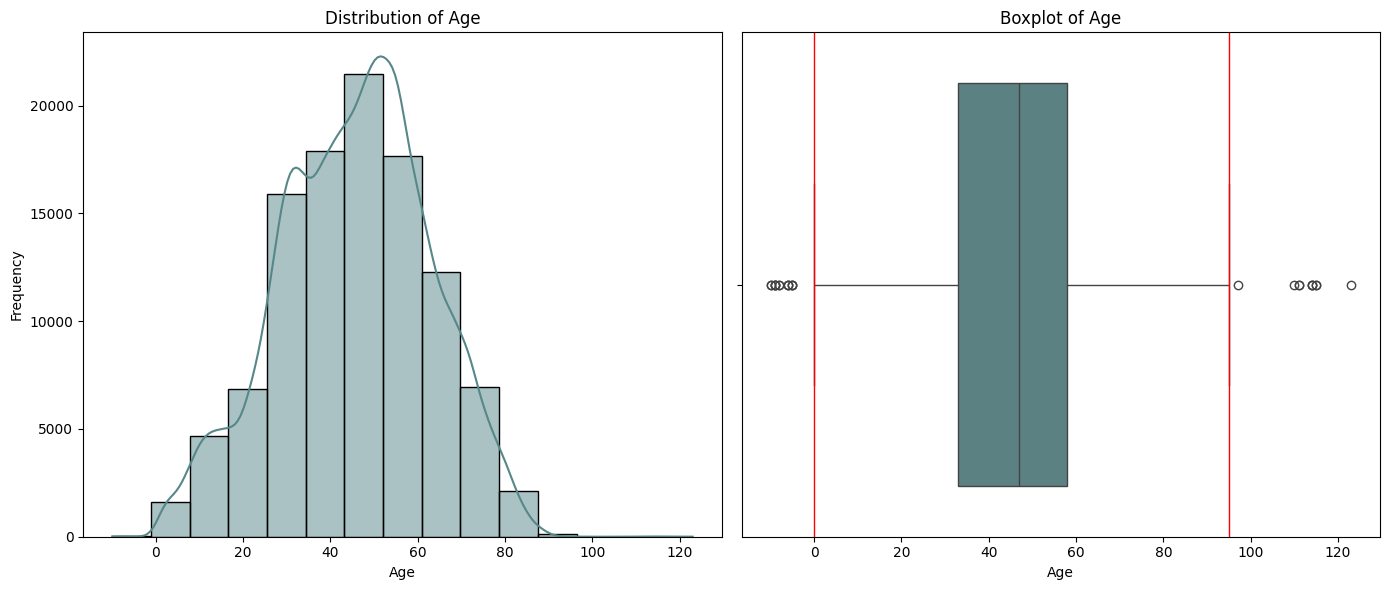

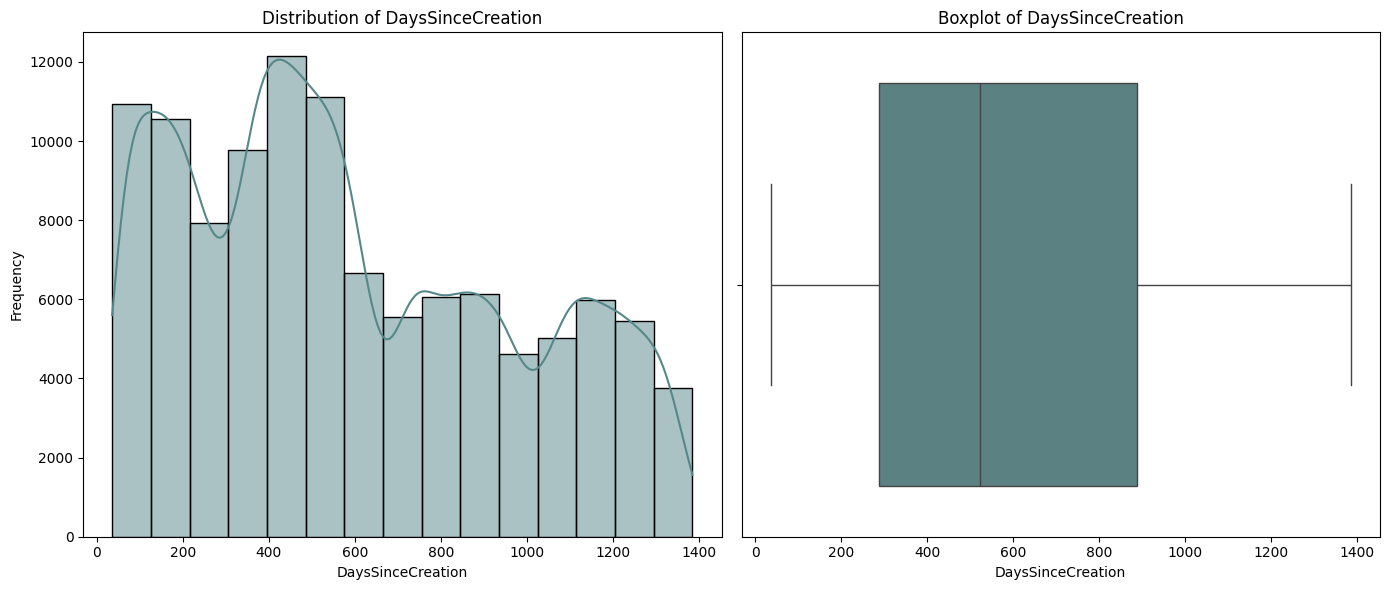

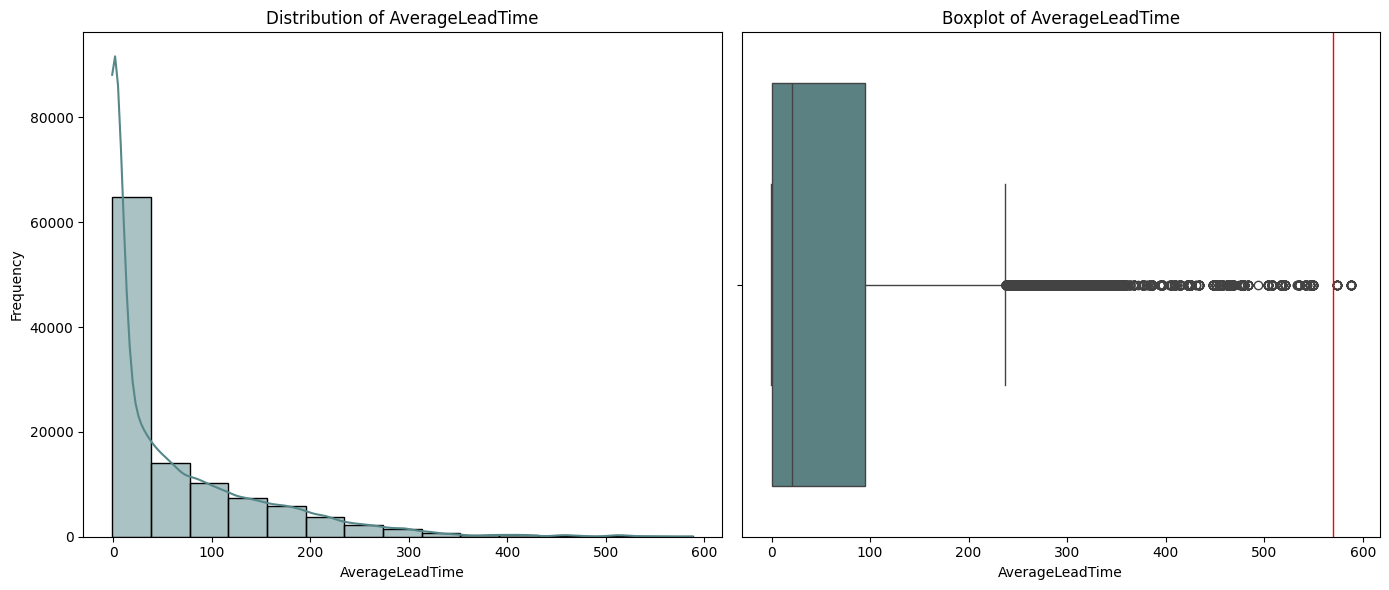

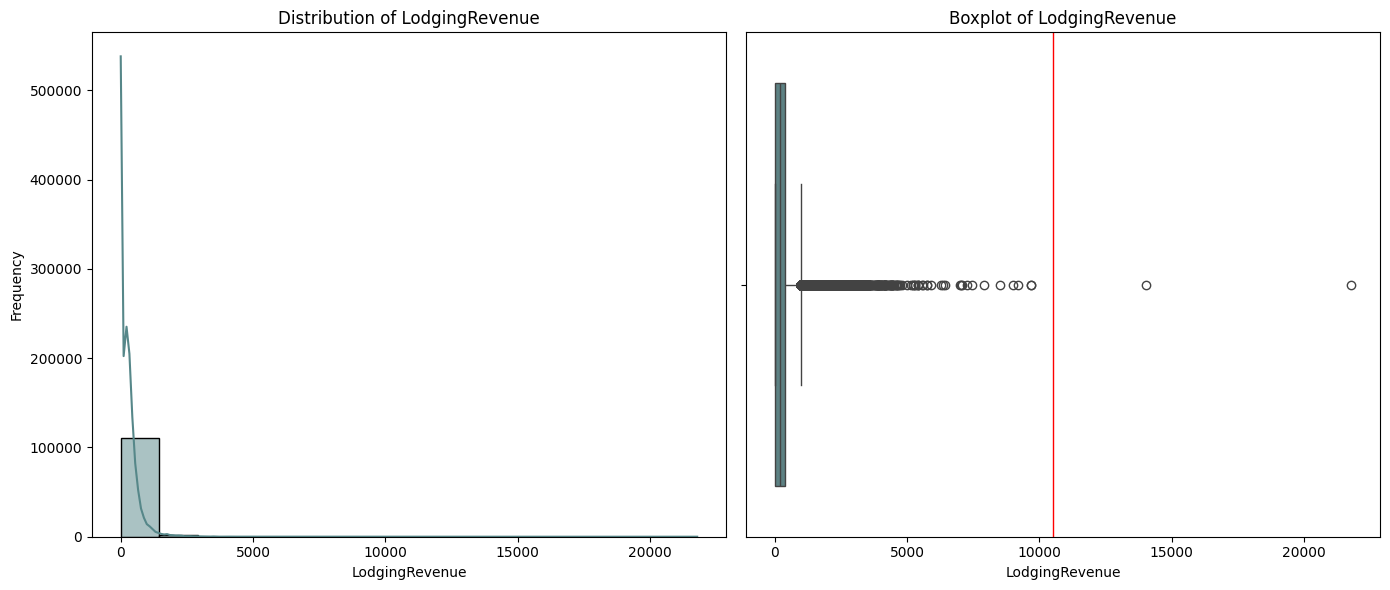

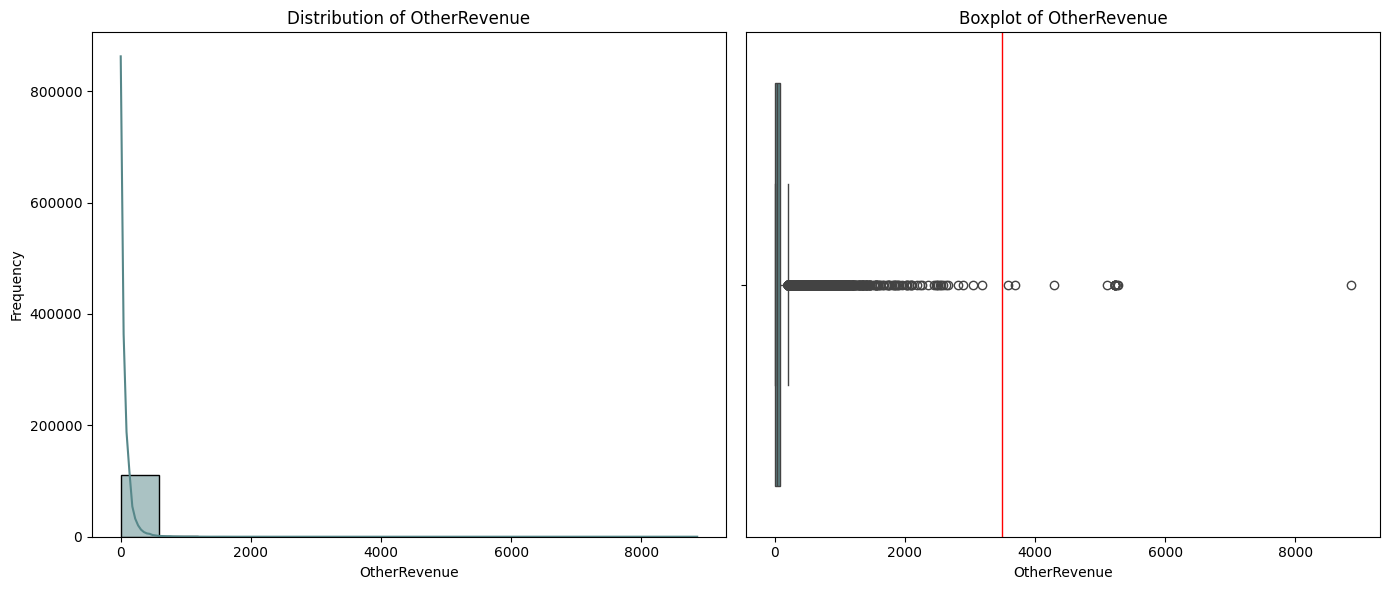

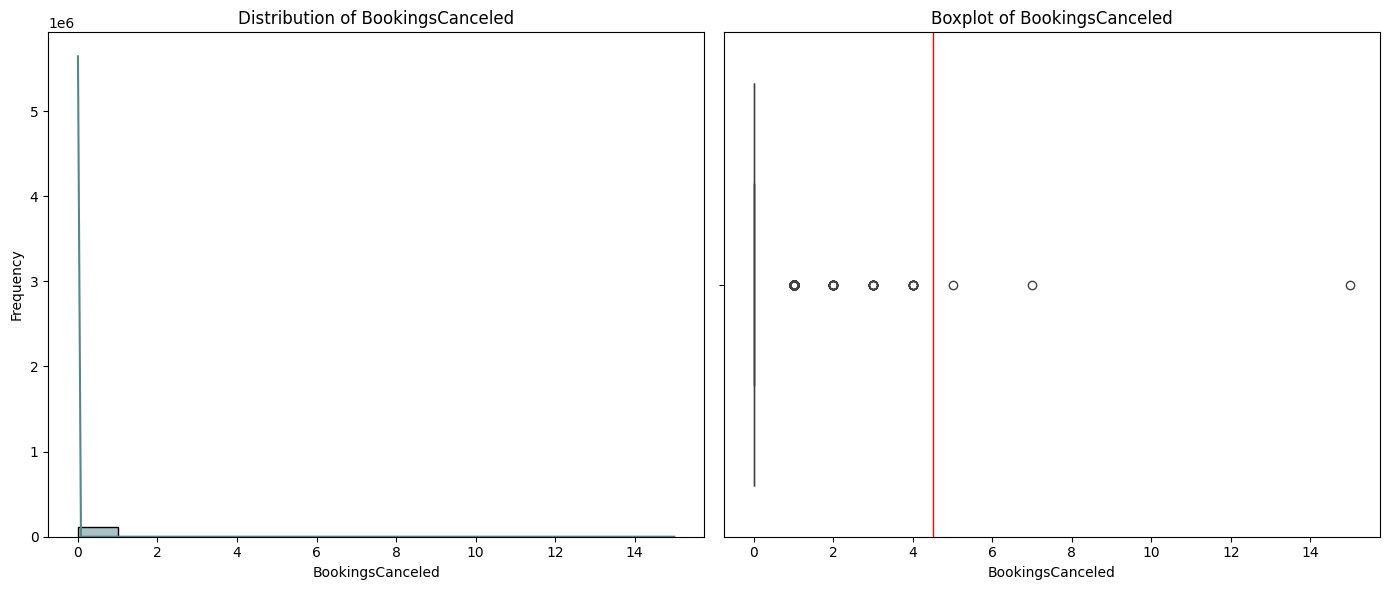

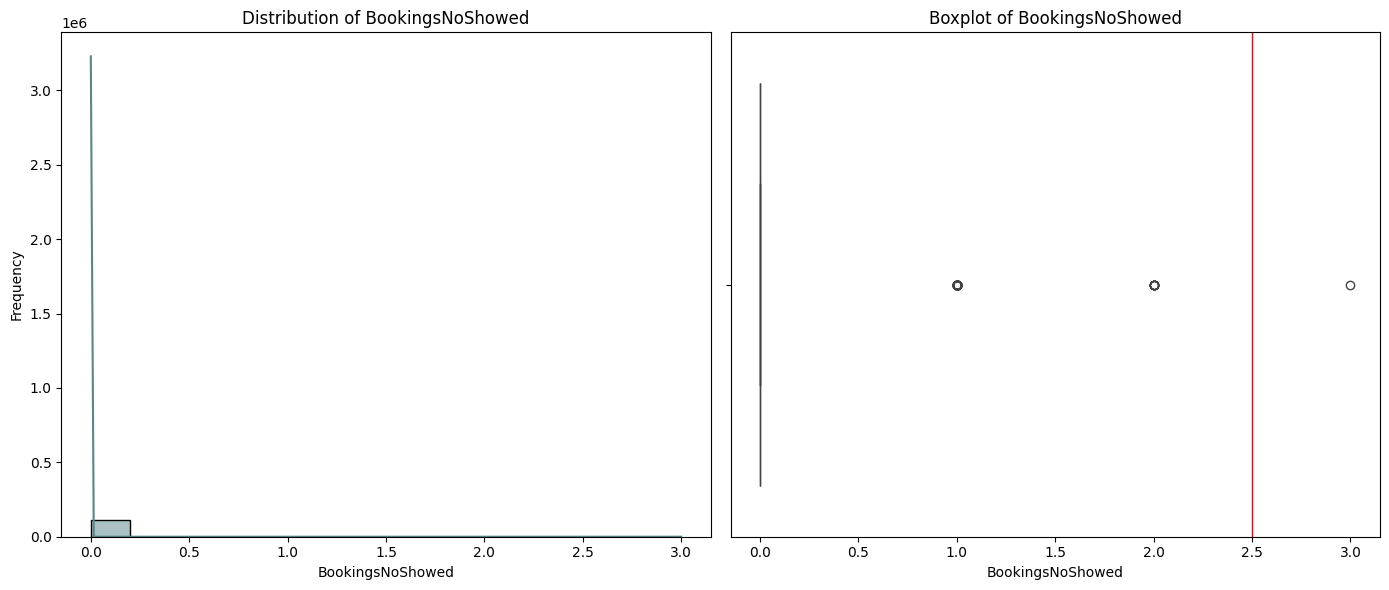

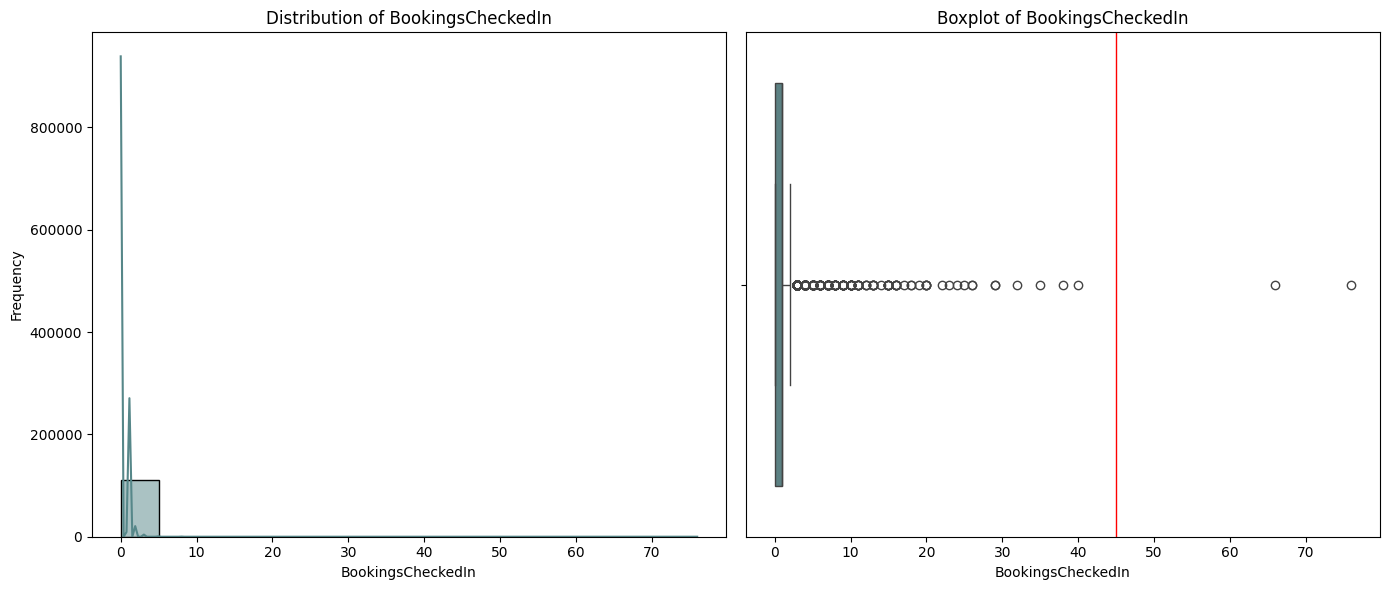

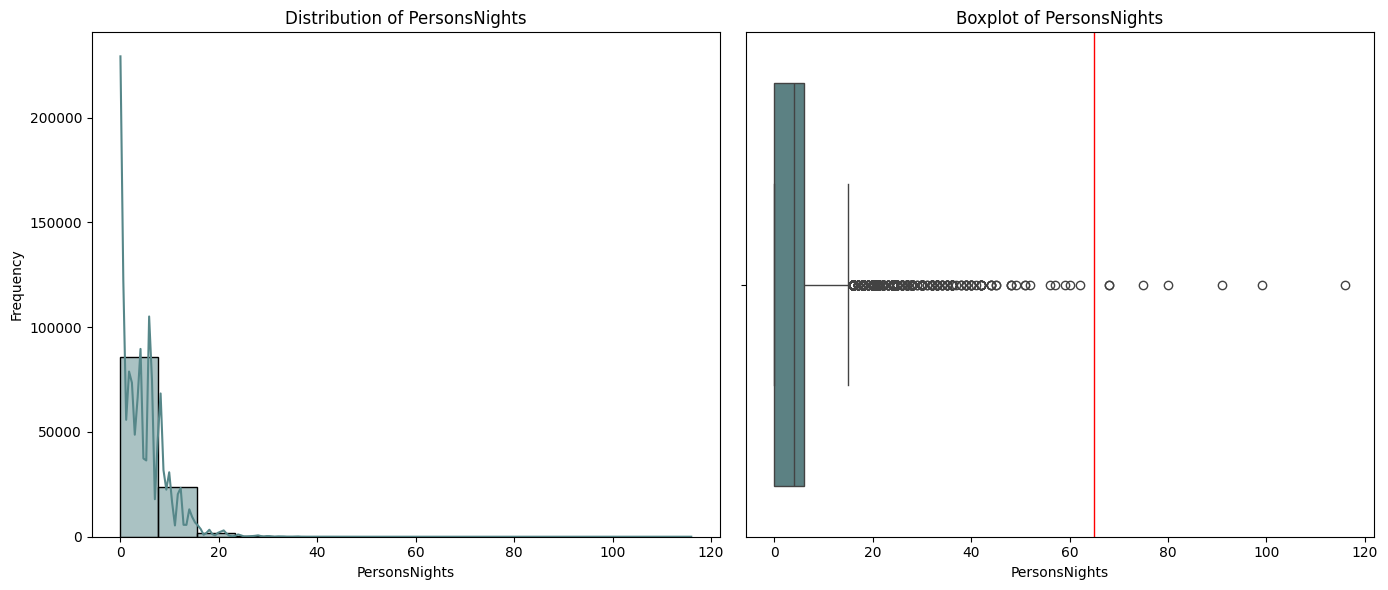

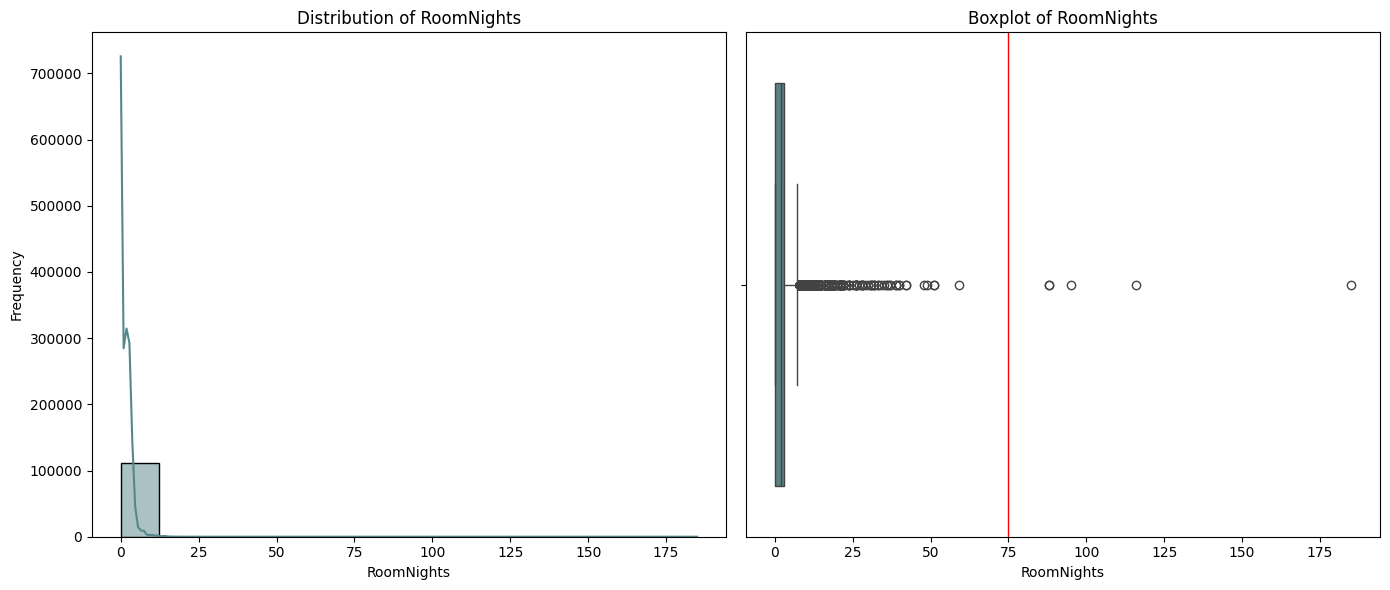

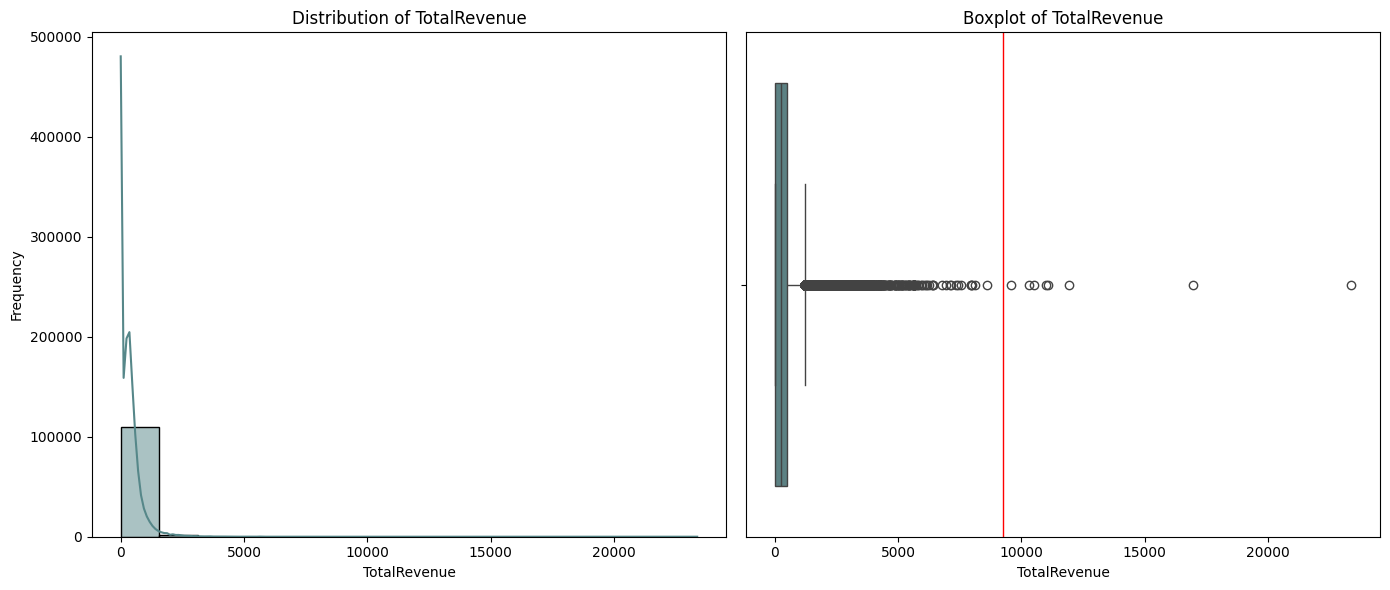

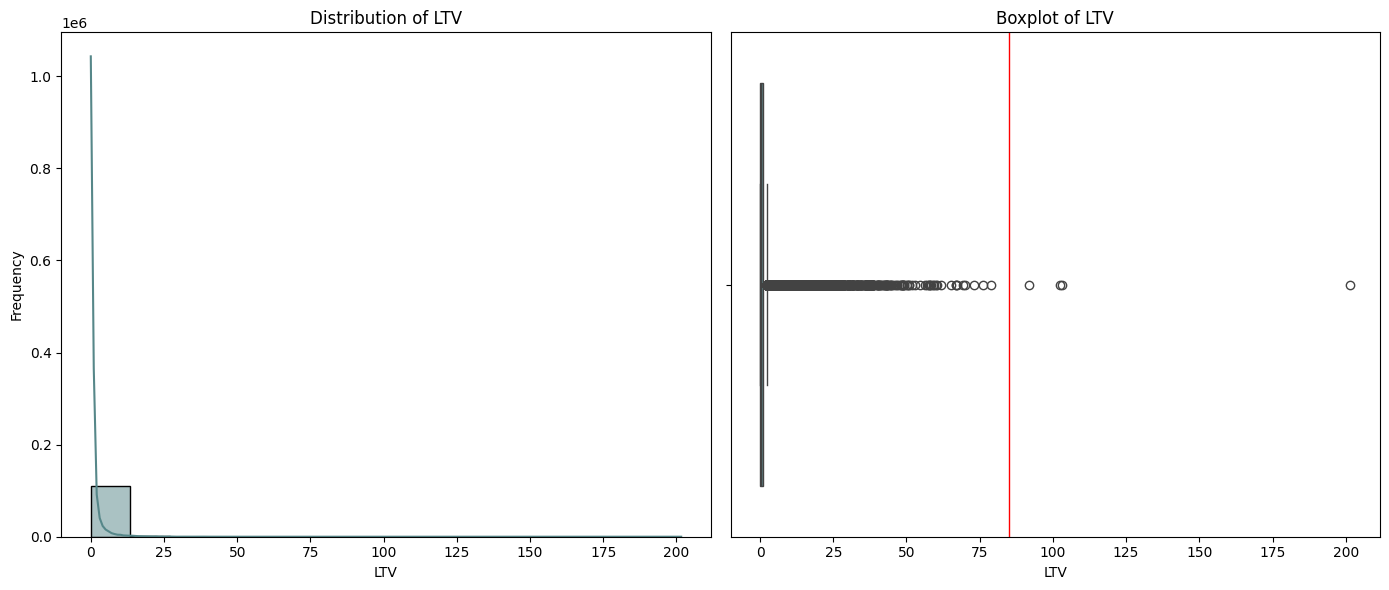

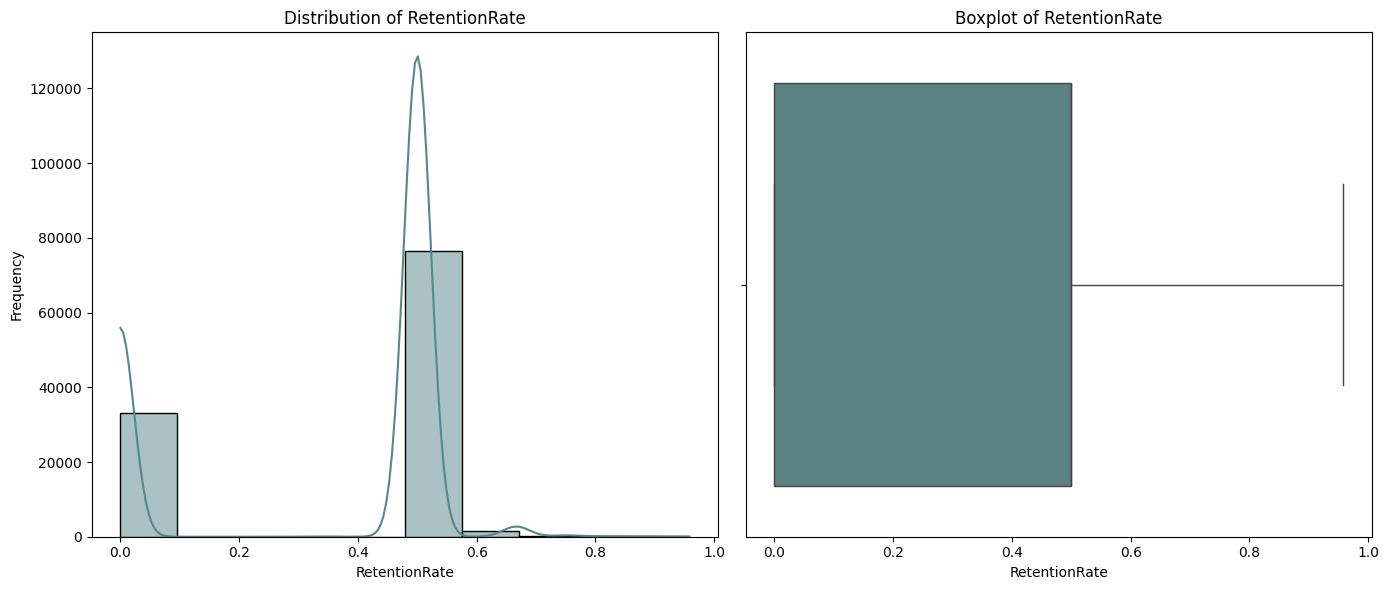

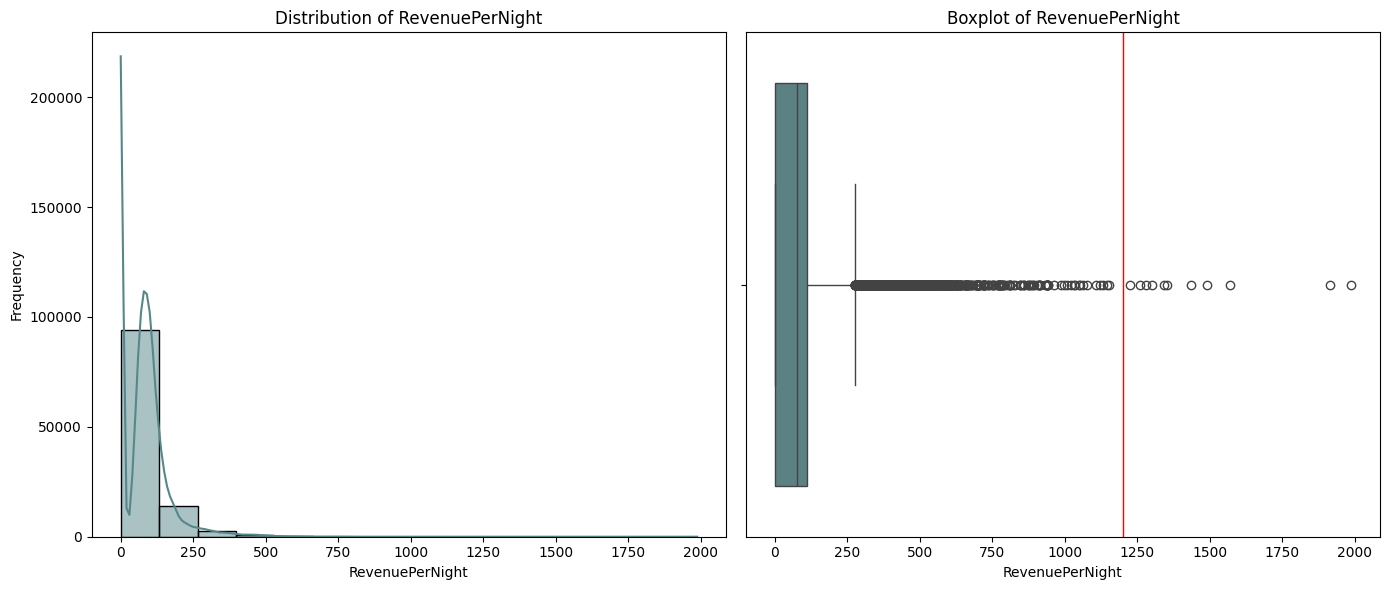

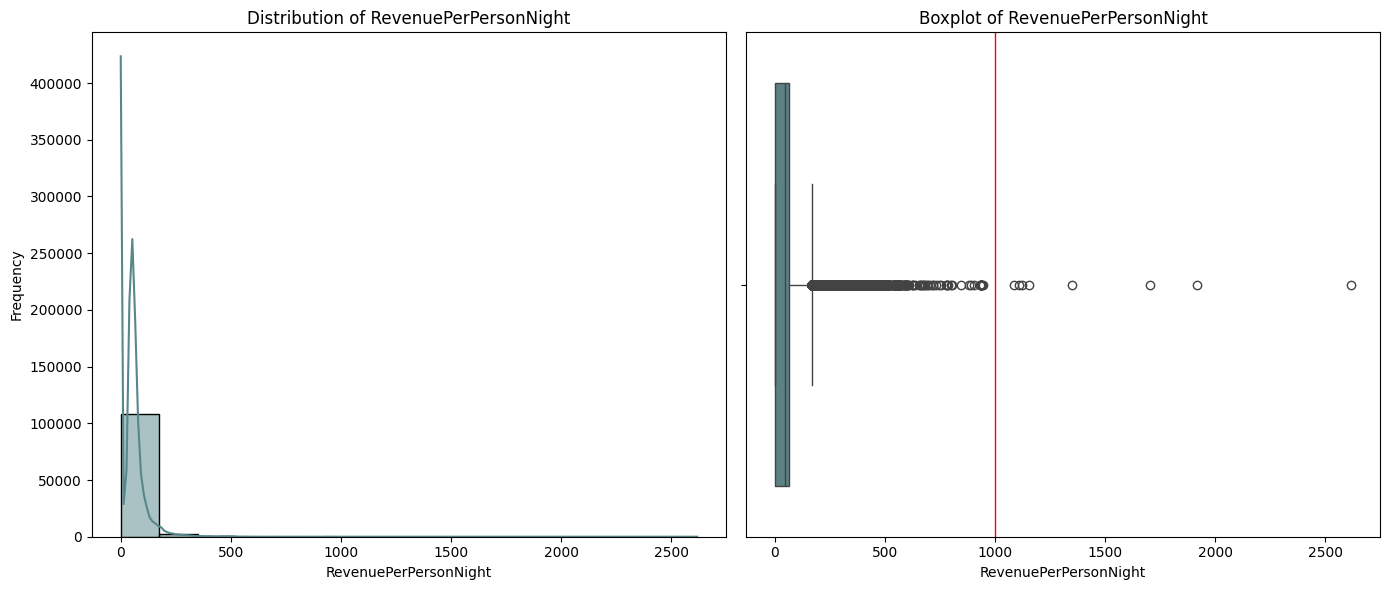

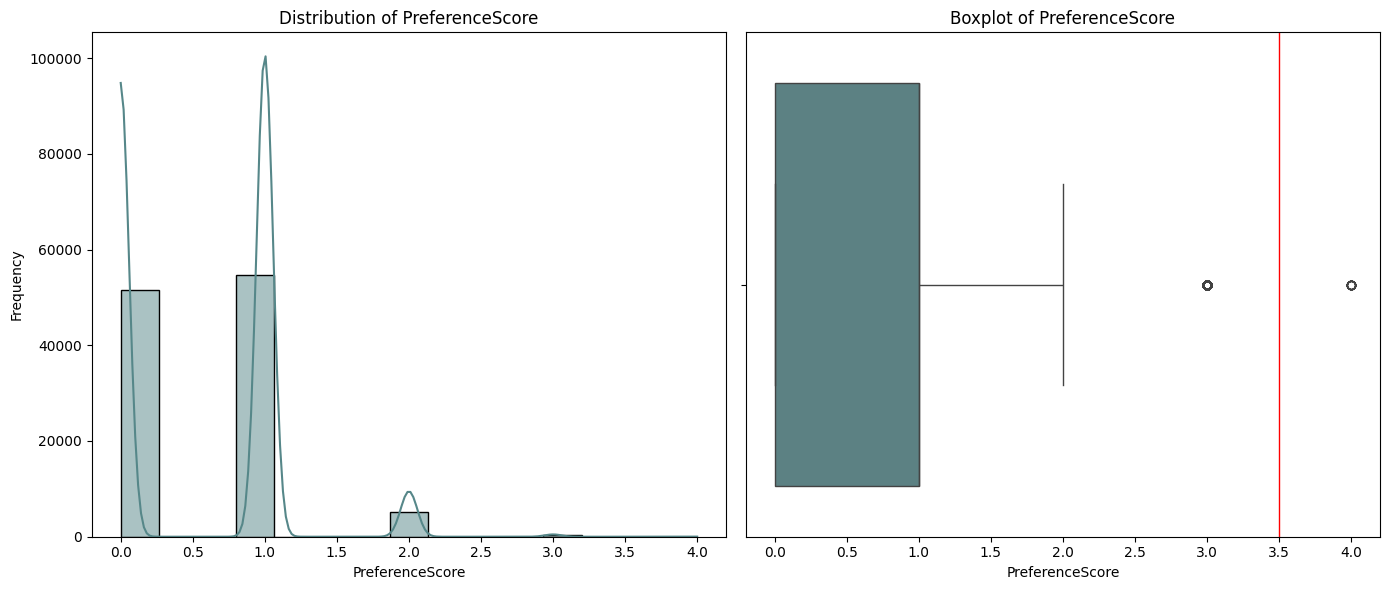

In [ ]:
# Assuming 'bookings' is your DataFrame and 'outliers_dict' is defined as in your example:
f.plot_multiple_distributions_and_boxplots(bookings, outliers_dict)

In [ ]:
for n_column in range(len(num_cols)):
    outliers_left = len(bookings[bookings[num_cols[n_column]] < outliers_dict[num_cols[n_column]]['left_out']])
    outliers_right = len(bookings[bookings[num_cols[n_column]] > outliers_dict[num_cols[n_column]]['right_out']])
    total_outliers = outliers_left + outliers_right
    print(f'In the column {num_cols[n_column]}, there are {total_outliers} points identified as outliers.')

In the column Age, there are 24 points identified as outliers.
In the column DaysSinceCreation, there are 0 points identified as outliers.
In the column AverageLeadTime, there are 29 points identified as outliers.
In the column LodgingRevenue, there are 2 points identified as outliers.
In the column OtherRevenue, there are 14 points identified as outliers.
In the column BookingsCanceled, there are 3 points identified as outliers.
In the column BookingsNoShowed, there are 1 points identified as outliers.
In the column BookingsCheckedIn, there are 2 points identified as outliers.
In the column PersonsNights, there are 7 points identified as outliers.
In the column RoomNights, there are 5 points identified as outliers.
In the column TotalRevenue, there are 8 points identified as outliers.
In the column LTV, there are 4 points identified as outliers.
In the column RetentionRate, there are 0 points identified as outliers.
In the column RevenuePerNight, there are 11 points identified as outl

In [ ]:
# Initialize the 'FlagOutlier' column with 0 (no outliers by default)
bookings['FlagOutlier'] = 0

# Loop over each numeric column to check for outliers
for col in num_cols:
    bookings['FlagOutlier'] |= (
        # For each column, check if the value is below the left threshold or above the right threshold
        (bookings[col] < outliers_dict[col]['left_out']) |
        (bookings[col] > outliers_dict[col]['right_out'])
    ).astype(int)
    # The |= operator updates 'FlagOutlier' to 1 if the condition is True for any column

# Print the total number of rows that have at least one outlier
print(f"There is a total of {bookings['FlagOutlier'].sum()} identified outliers.")

There is a total of 109 identified outliers.


### 4.4.2 Multivariate Outliers

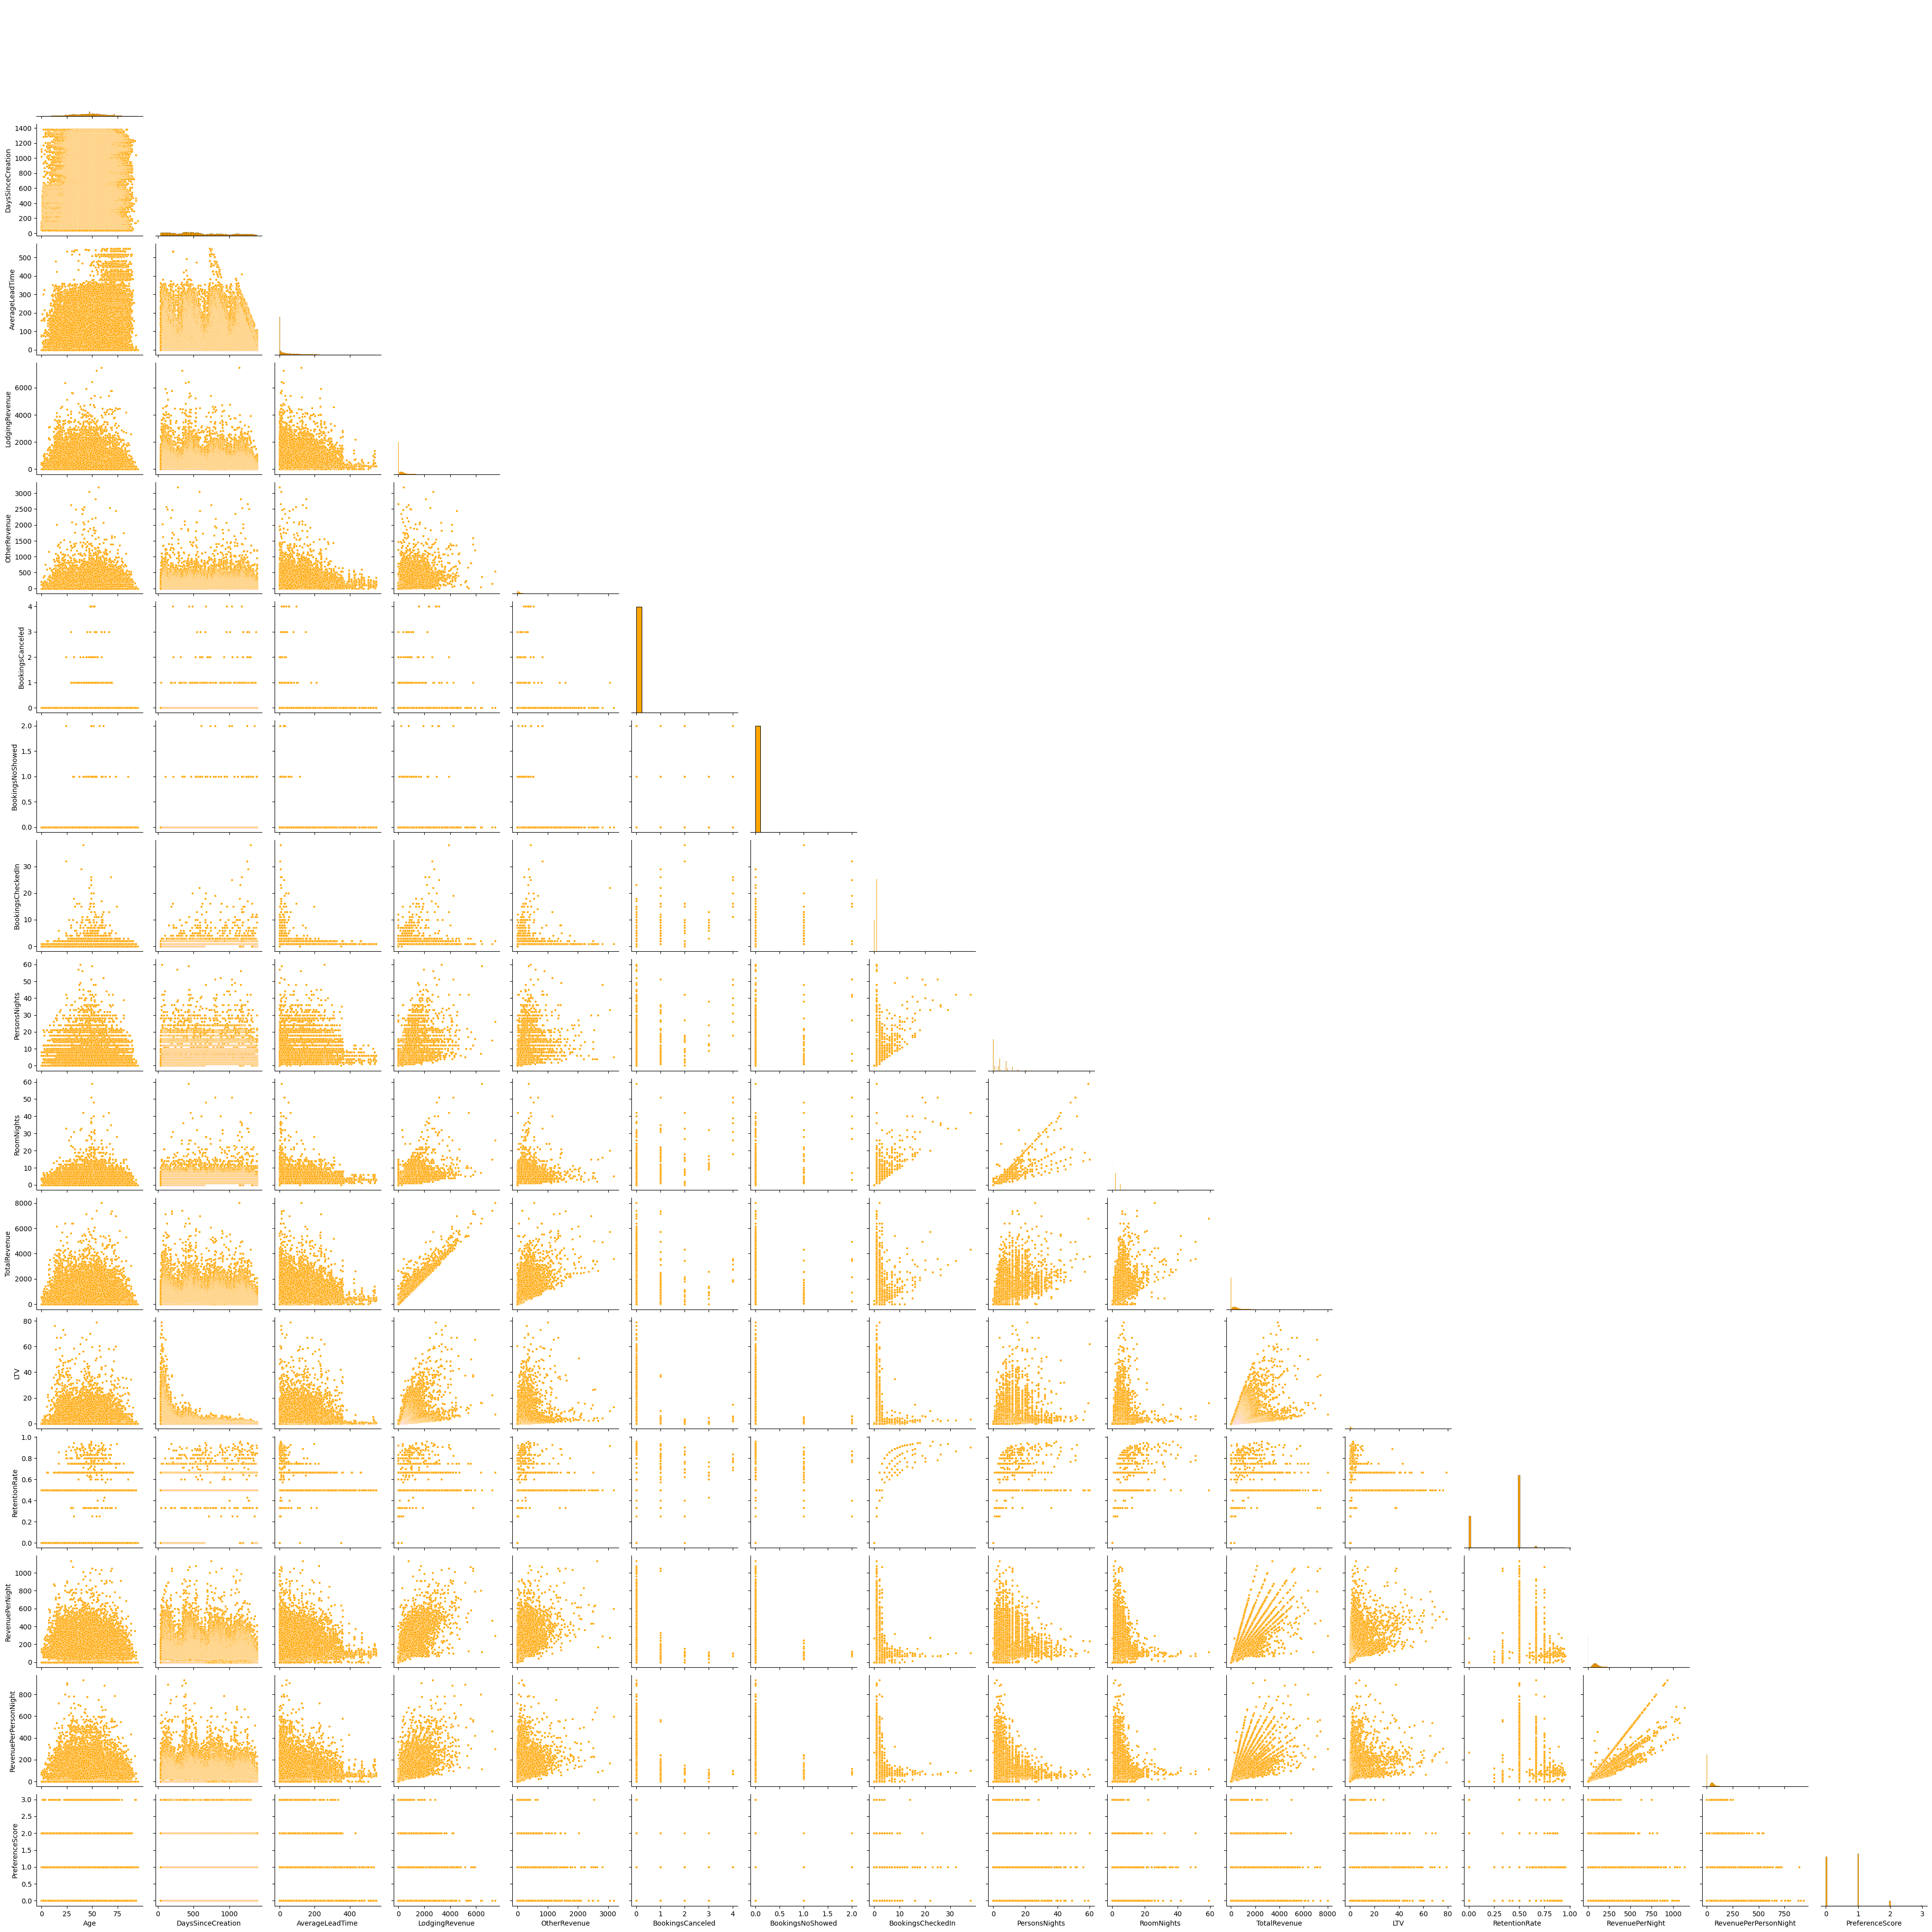

In [ ]:
# Filter the DataFrame for 'FlagOutlier' == 0
df_filtered = bookings[bookings['FlagOutlier'] == 0]

# Create the pairplot for the specified numerical columns
sns.pairplot(df_filtered[num_cols])
    
# Show the plot
plt.show()

# <span style="color: yellow;">Testing</span>

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

copy_df = df[num_cols].copy().dropna()

# Standardize the data (important!)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(copy_df)

# Initialize Isolation Forest
iso_forest = IsolationForest(
    contamination=0.02,  # Proportion of expected outliers
    random_state=42
)

# Fit the model and predict
outlier_preds = iso_forest.fit_predict(scaled_data)

# Add results to your DataFrame
copy_df['outlier'] = outlier_preds

# In Isolation Forest:
#   -1 means outlier
#    1 means inlier
copy_df['outlier'].value_counts()


outlier
 1    105409
-1      2152
Name: count, dtype: int64

# Export

In [ ]:
# df.to_csv('./treated_data.csv')